In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [128]:
data = pd.read_csv("census.csv")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [129]:
print(f"Target: 'Income'\nUnique Values in Income: {data.income.unique()}\nNumber of unique values: {data.income.nunique()}")

Target: 'Income'
Unique Values in Income: ['<=50K' '>50K']
Number of unique values: 2


In [130]:
data.income.dtypes

dtype('O')

In [131]:
data.shape

(32561, 15)

In [132]:
data.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [133]:
data.isnull()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [134]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

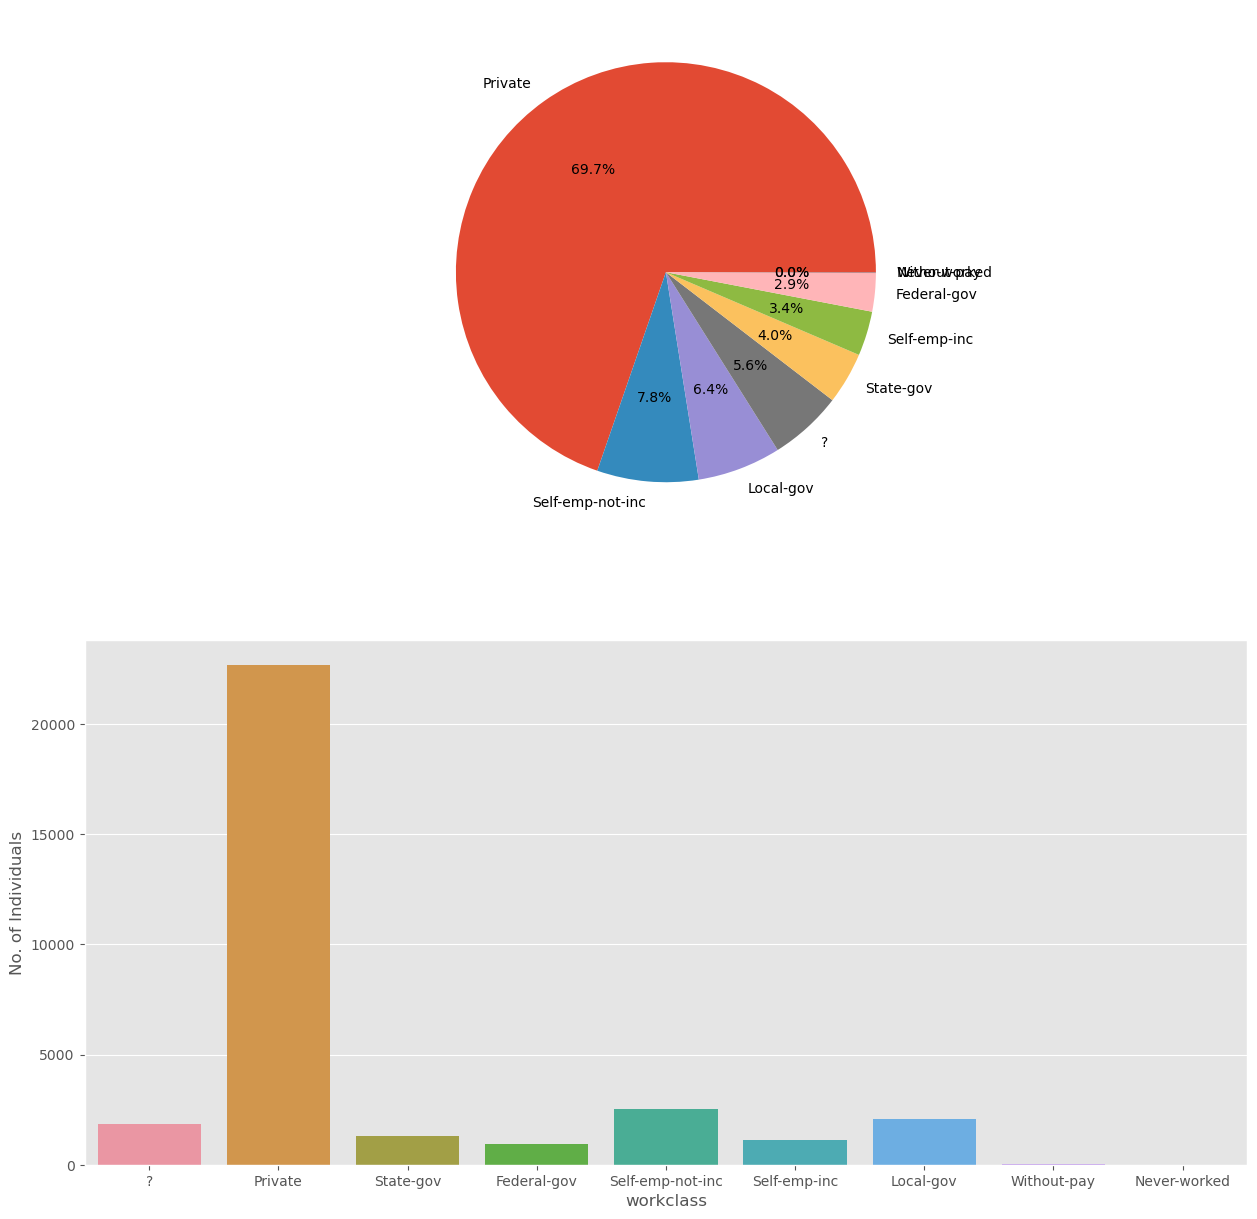

In [135]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
data['workclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='workclass',data=data)
plt.ylabel('No. of Individuals')
data['workclass'].value_counts()

Dataset if highly imbalanced. There is less than 25% of >50K income category while more than 75% of <=50K income.

In [148]:
#Separating categorical and continuous variables
cat=[feature for feature in data.columns if data[feature].nunique()<45]
cont=[feature for feature in data.columns if data[feature].nunique()>45]

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

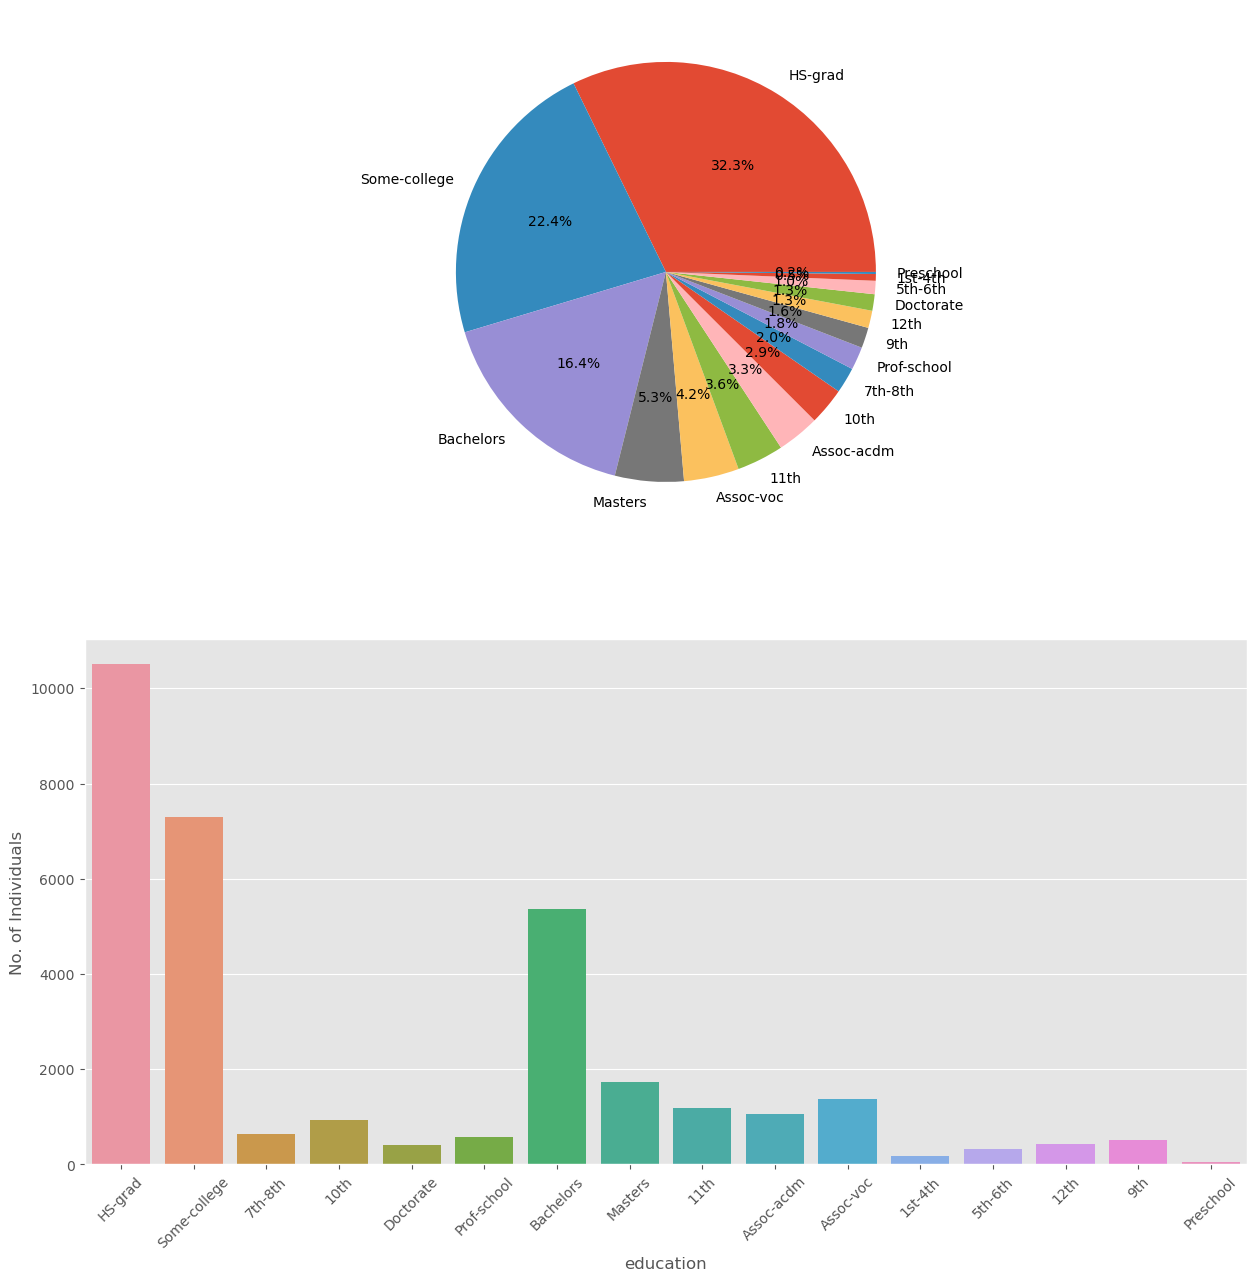

In [136]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
data['education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='education',data=data)
plt.xticks(rotation=45)
plt.ylabel('No. of Individuals')
data['education'].value_counts()

Minimum 17
Maximum 90


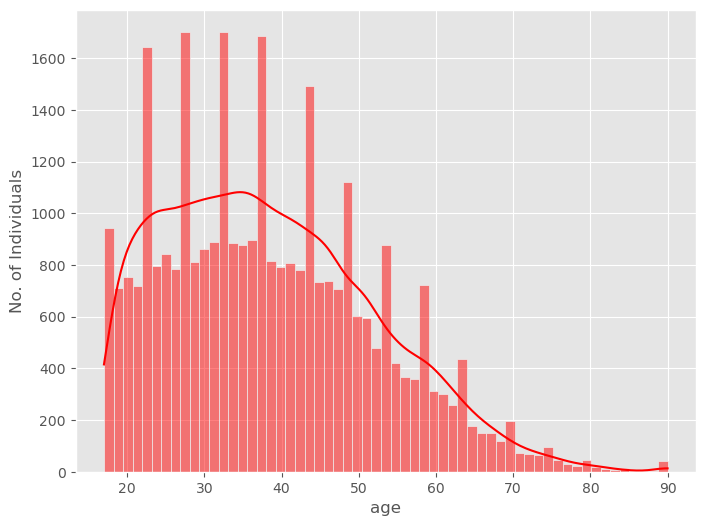

In [137]:
plt.figure(figsize=(8,6))
sns.histplot(data['age'],kde=True,color='r')
plt.ylabel('No. of Individuals')
print('Minimum',data['age'].min())
print('Maximum',data['age'].max())

Minimum 12285
Maximum 1484705


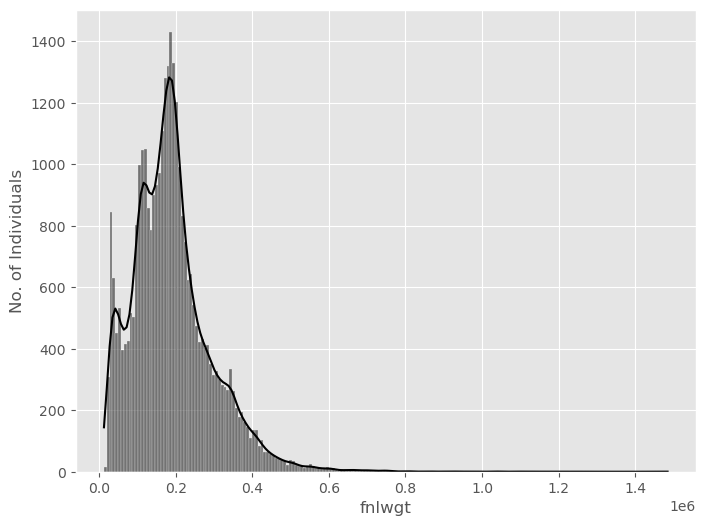

In [139]:
plt.figure(figsize=(8,6))
sns.histplot(data['fnlwgt'],kde=True,color='k')
plt.ylabel('No. of Individuals')
print('Minimum',data['fnlwgt'].min())
print('Maximum',data['fnlwgt'].max())

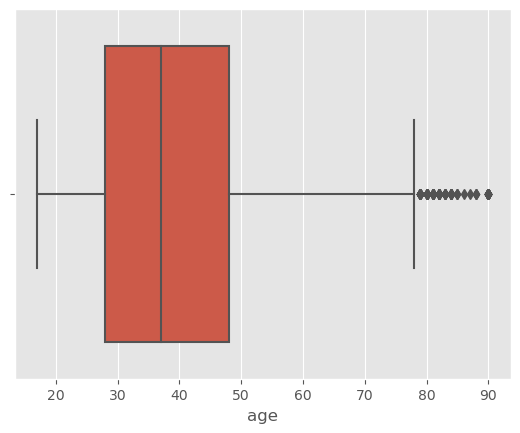

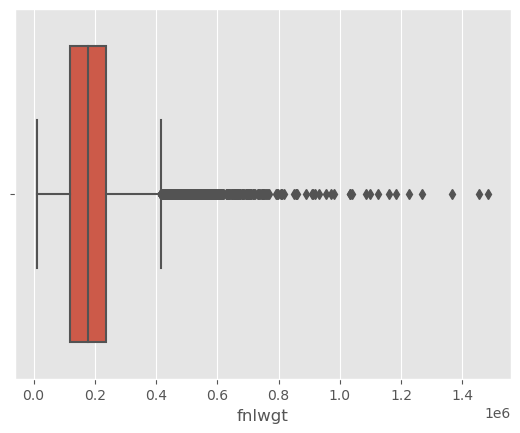

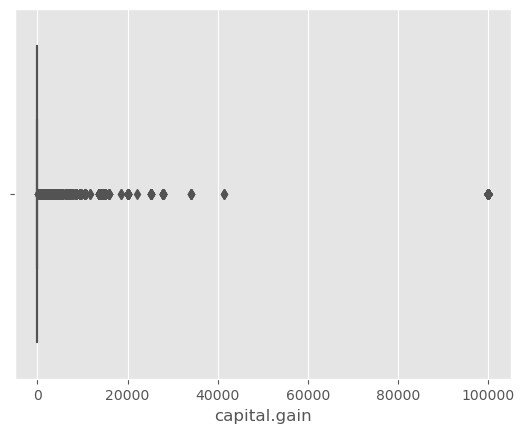

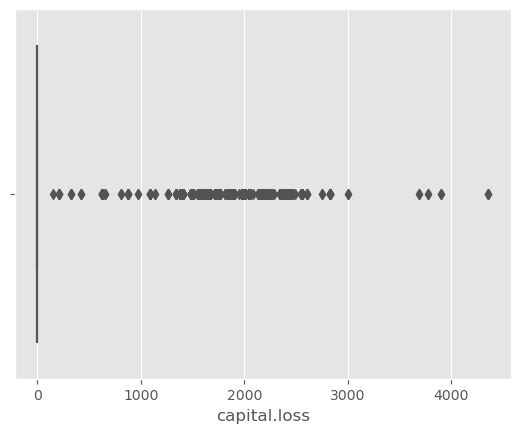

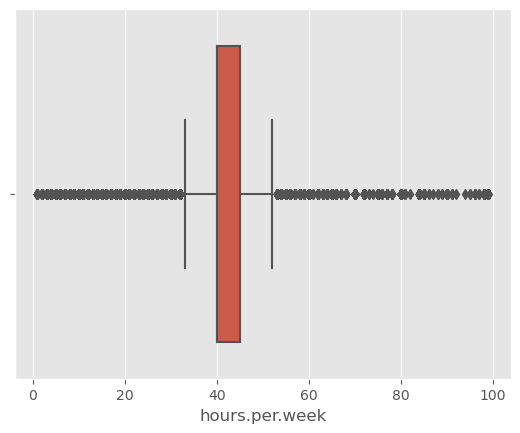

<Figure size 640x480 with 0 Axes>

In [149]:
for i in cont:
    sns.boxplot(data[i])
    plt.figure()

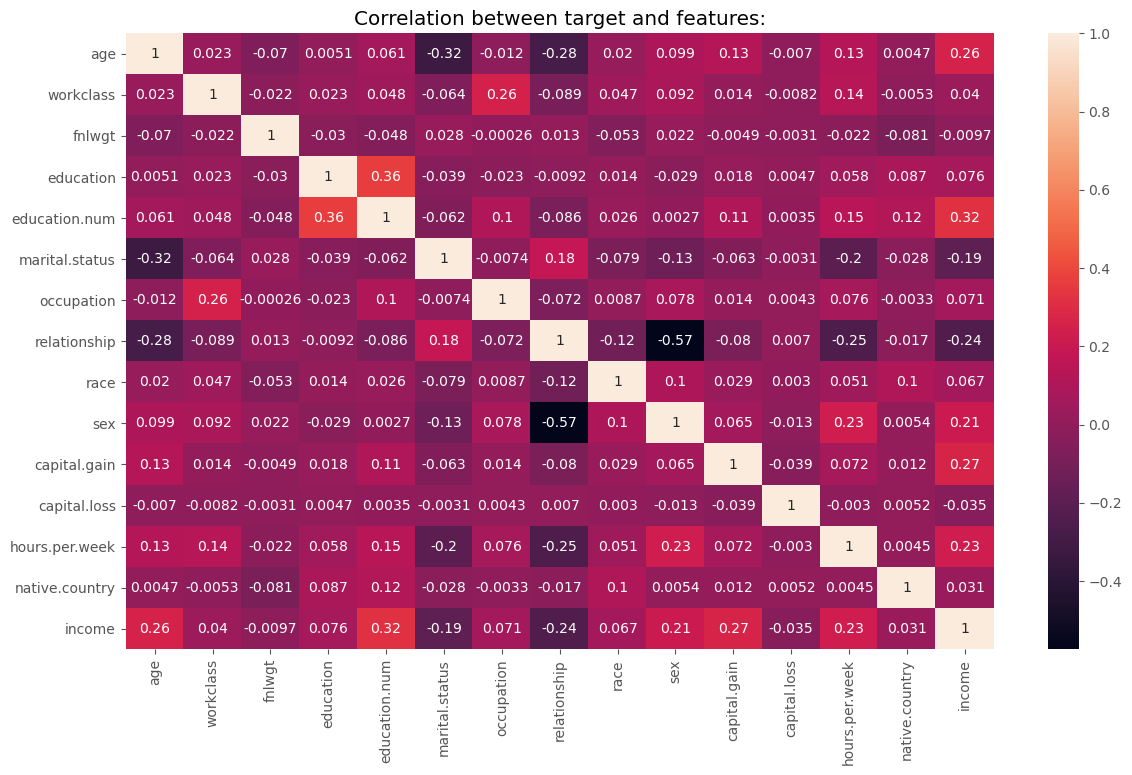

In [167]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(data.corr(), annot = True)
plt.show()

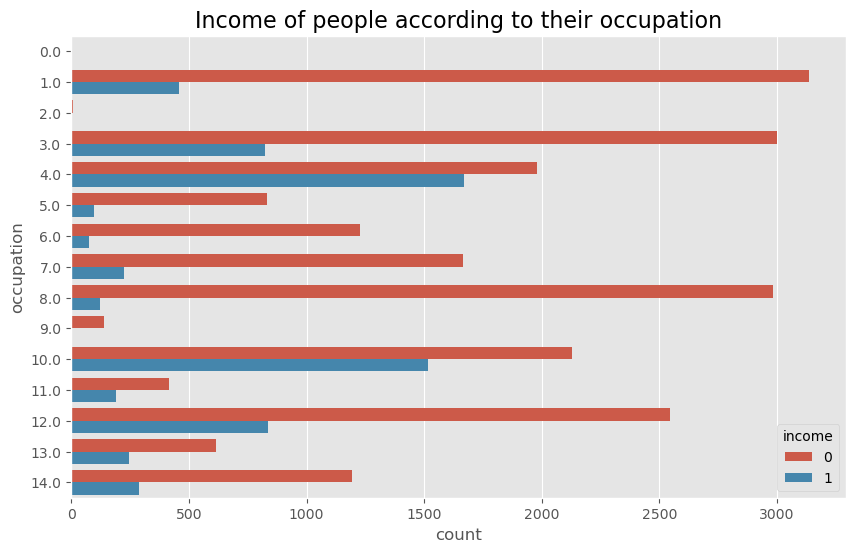

In [179]:
plt.style.use('ggplot')
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = data['occupation'], hue = ds['income'])
plt.show()

In [150]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
l=LabelEncoder()
o=OrdinalEncoder()

In [151]:
#We use ordinal encoder to Encode Independent features
for i in data.columns:
    if data[i].dtypes=='O' and i!='income':
        data[i]=o.fit_transform(data[i].values.reshape(-1,1))

In [152]:
#We use label encoder to encode label 
data['income']=l.fit_transform(data['income'])

### Outliers

BoxPlots of the features:


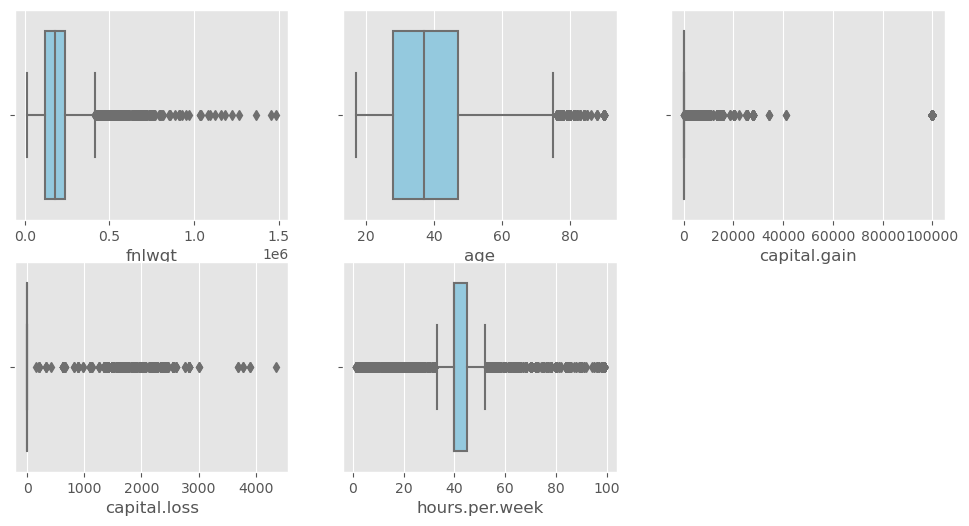

In [177]:
plt.style.use('default')
plt.style.use('ggplot')
clist = ['fnlwgt','age','capital.gain','capital.loss','hours.per.week']
plt.figure(figsize = (12,6))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(ds[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

### Removing Outliers


In [153]:
from scipy.stats import zscore

In [155]:
#Method to find optimum threshold
def threshold():
    for i in np.arange(3,5,0.2):
        df=data.copy()
        df=df[(z<i).all(axis=1)]
        loss=(data.shape[0]-df.shape[0])/data.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [156]:
z=np.abs(zscore(data))
threshold()

With threshold 3.0 data loss is 15.79%
With threshold 3.2 data loss is 12.17%
With threshold 3.4 data loss is 11.1%
With threshold 3.6 data loss is 10.2%
With threshold 3.8 data loss is 9.0%
With threshold 4.0 data loss is 8.44%
With threshold 4.2 data loss is 7.46%
With threshold 4.4 data loss is 6.08%
With threshold 4.6 data loss is 4.37%
With threshold 4.8 data loss is 1.55%


In [157]:
data=data[(z<4.2).all(axis=1)]

### Removing Skewness


In [158]:
#using Power transformer to remove skewness
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [159]:
for i in cont:
    if np.abs(data[i].skew())>0.5:
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))

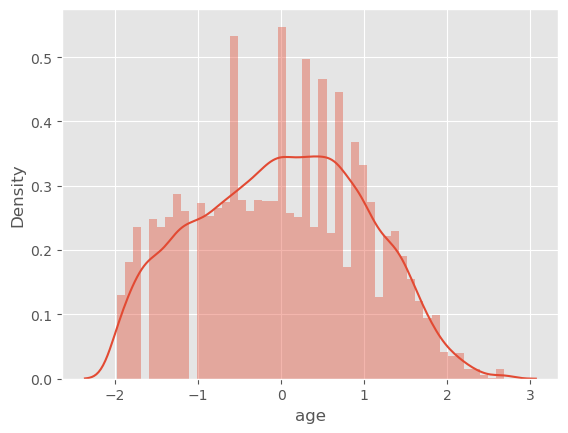

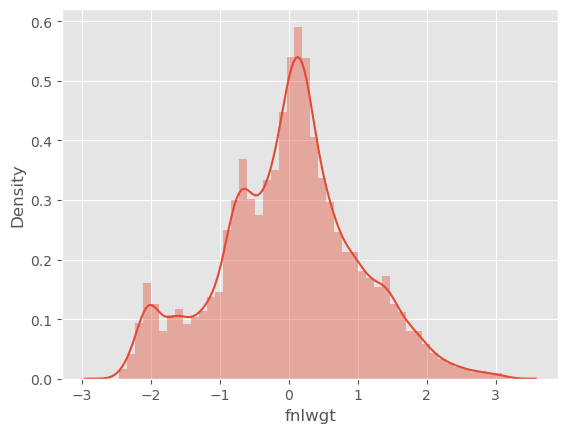

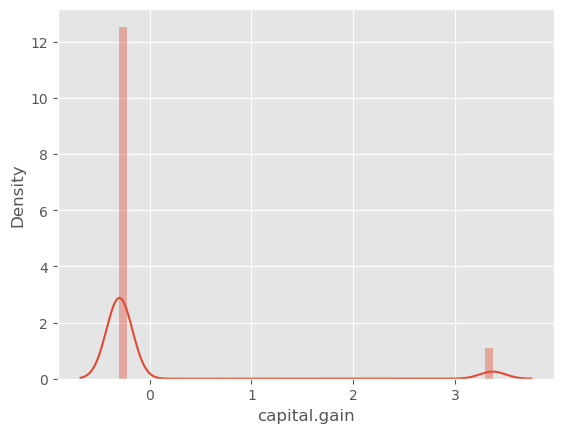

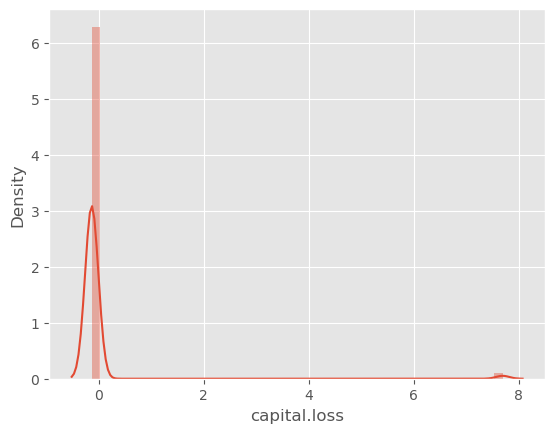

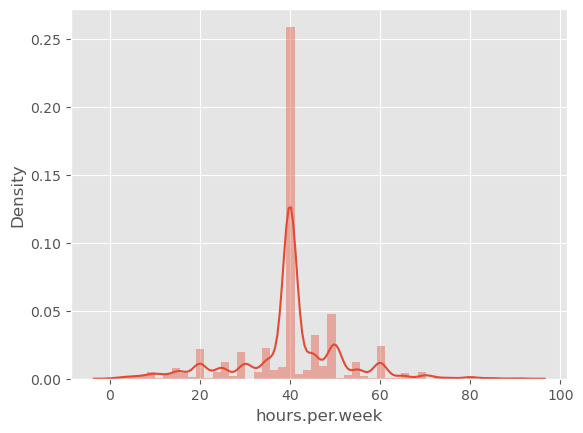

<Figure size 640x480 with 0 Axes>

In [160]:
for i in cont:
    sns.distplot(data[i])
    plt.figure()

In [161]:
#Separating dependent and independent features.
x=data.copy()
x.drop('income',axis=1,inplace=True)
y=data['income']

In [162]:
#Oversampling using Smote
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [163]:
x,y=over.fit_resample(x,y)

1    23424
0    23424
Name: income, dtype: int64

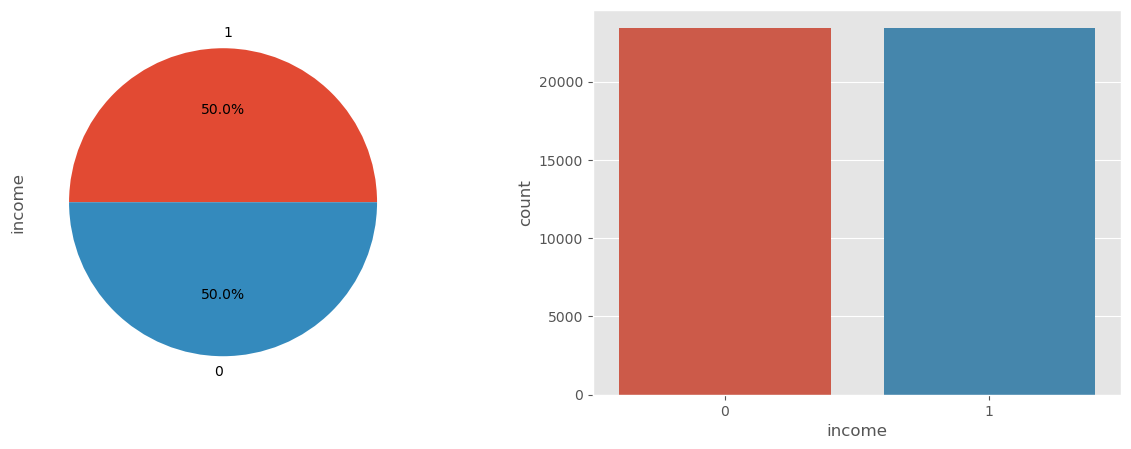

In [164]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

### Scaling the data

In [165]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [166]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

### Model Building:

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 51, 77.53112771255782


Best possible random state is 67, so using it to split the data

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 67)

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Model Fitting:

In [171]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

# For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model is", accuracy_score(y_test, pred_nb)*100)

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

Accuracy Score of Logistic Regression model is 76.7840626111704
Accuracy Score of Decision Tree Classifier model is 85.69192458199929
Accuracy Score of K-Nearest Neighbour Classifier model is 85.07292778370686
Accuracy Score of Support Vector Classifier model is 83.05940946282462
Accuracy Score of Random Forest model is 89.77588046958378
Accuracy Score of MultinomialNB model is 74.30807541800071
Accuracy Score of ADA Boost model is 85.02312344361437


### Cross Validation:

Cross validating the m,odels to see if they are underfitting or overfitting and to prevent bias. We will compare the mean accuracy scores of the model.

In [172]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x, y, cv = 10) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x, y, cv = 10)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x, y, cv = 10)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x, y, cv = 10)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x, y, cv = 10)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")

nb_scores = cross_val_score(nb, x, y, cv = 10)
print(nb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {nb_scores.mean()*100}\n")

ada_scores = cross_val_score(ada, x, y, cv = 10)
print(ada_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ada_scores.mean()*100}\n")

[0.60298826 0.7506937  0.75752401 0.77545358 0.77694771 0.78228388
 0.77459979 0.78164354 0.78266439 0.76793339]
Mean of accuracy scores is for Logistic Regression is 75.5273225139374

[0.65869797 0.73895411 0.76414088 0.89178228 0.8905016  0.88943436
 0.89498399 0.8909285  0.89069172 0.88962425]
Mean of accuracy scores is for Decision Tree Classifier is 83.99739661893119

[0.63201708 0.83073639 0.84631804 0.86830309 0.87491996 0.8796158
 0.87705443 0.87534685 0.88023057 0.87083689]
Mean of accuracy scores is for KNN Classifier is 84.35379096577098

[0.6565635  0.80576307 0.80939168 0.83628602 0.84653148 0.84631804
 0.85165422 0.84759872 0.85183604 0.84137489]
Mean of accuracy scores is for SVC Classifier is 81.93317654414265

[0.69263607 0.80469584 0.82753469 0.92764141 0.9321238  0.9244397
 0.93724653 0.93255069 0.92869342 0.9295474 ]
Mean of accuracy scores is for Random Forest Classifier is 88.37109549801454

[0.58932764 0.73895411 0.74066169 0.75432231 0.75410886 0.74983991
 0.756

Random forest classifier is the best model with highest cross validation mean score and accuracy score. We will use it for the model building.

### Hyperparameter Tuning:

Tuning the parameters of the Random Forest in order to obtain the best possible parameters for model building.

In [173]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param = dict()
param['criterion'] = ['gini', 'entropy']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]


gs = GridSearchCV(estimator = rfc, param_grid = param, scoring='f1', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8956690712206242
{'criterion': 'entropy', 'min_samples_split': 2, 'n_estimators': 200}


In [174]:
rfc = RandomForestClassifier(criterion = 'entropy', min_samples_split = 2, n_estimators = 100)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
pred_rfc = rfc.predict(x_test)

0.9999695056871893


### Model Evaluation

Accuracy Score of RFC model is 89.74030594094629
Confusion matrix for RFC Model is
[[6219  796]
 [ 646 6394]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7015
           1       0.89      0.91      0.90      7040

    accuracy                           0.90     14055
   macro avg       0.90      0.90      0.90     14055
weighted avg       0.90      0.90      0.90     14055



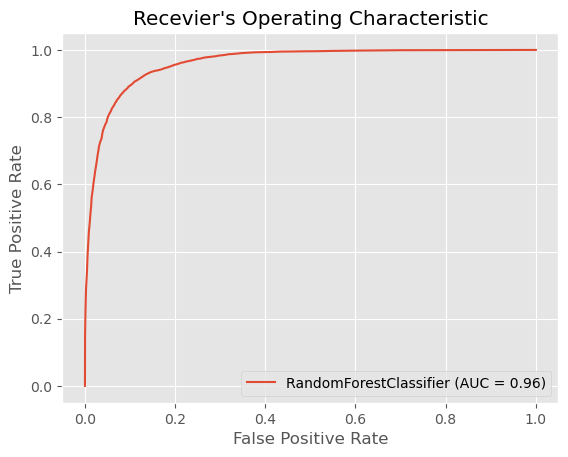

In [175]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))

plot_roc_curve(rfc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

After the model evaluation , we get the precision and recall for both the target variable as 0.90 and 0.91. The f1- score of the model is 0.91.he ROC curve gave us the AUC score which is 0.96. Model evaluation gives the results that the prediction is very accurate.

### Serialisation


In [182]:
import joblib
joblib.dump(rfc, "census_income_predictor.pkl")

['census_income_predictor.pkl']

In [183]:
model = joblib.load("census_income_predictor.pkl")